# 3. Análisis Exploratorio de Datos



## 3.1 Importación de modulos de Python a usar

Durante este capítulo se usarán los siguientes módulos:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 3.2 Lectura del dataset

Se usa pandas para leer el dataset modificado en el capitulo anterior y almacenarlo en un objeto DataFrame que nos permita su manipulación con más facilidad.

In [3]:
path = '../Data/Ames-Housing-Processed.csv'

df = pd.read_csv(path, delimiter=',')

## 3.3 Exploración de la variable objetivo

Para la exploración de la variable objetivo 'SalePrice', realizamos varios graficos que nos permitan sacar conclusiones sobre su distribución y comportamiento.

### 3.3.1 Histograma

Primero realizamos un histograma para visualizar la distribución del precio de venta. Observamos una forma ligreramente acampanada, con asimetría positiva (sesgo a la derecha), como podemos observar en la **Figura 3.1.**

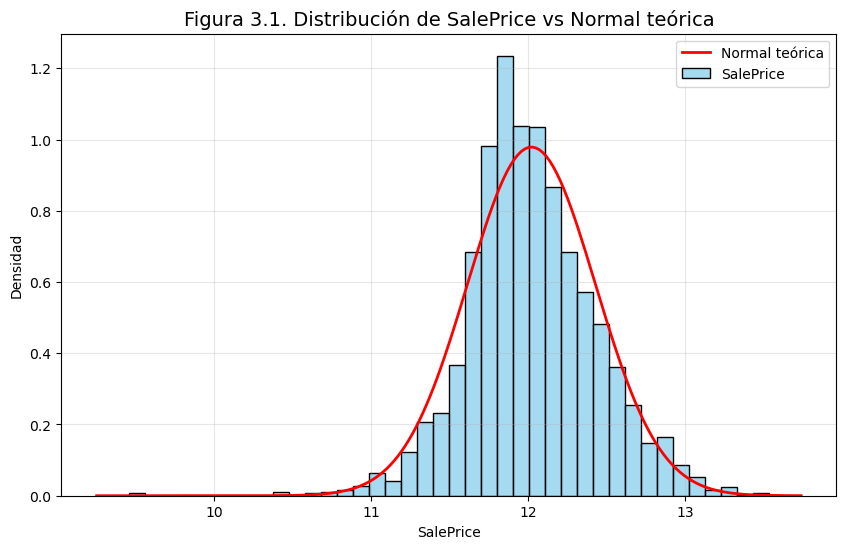

In [4]:
# Variable de interés
saleprice = df['SalePrice'].dropna()

# Calcular parámetros de la normal teórica
mu, sigma = saleprice.mean(), saleprice.std()

# Graficar histograma con distribución normal
plt.figure(figsize=(10,6))
sns.histplot(saleprice, bins=40, kde=False, color='skyblue', stat='density', label='SalePrice')

# Curva normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2, label='Normal teórica')

plt.title('Figura 3.1. Distribución de SalePrice vs Normal teórica', fontsize=14)
plt.xlabel('SalePrice')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



### 3.3.2 BoxPlot

Ahora, realizamos un boxplot (**Figura 3.2**) que nos permita validar la presencia de outliers. Confirmamos que evidentemente existen outliers que se salen del rango Intercuartil, los cuales trataremos más adelante.

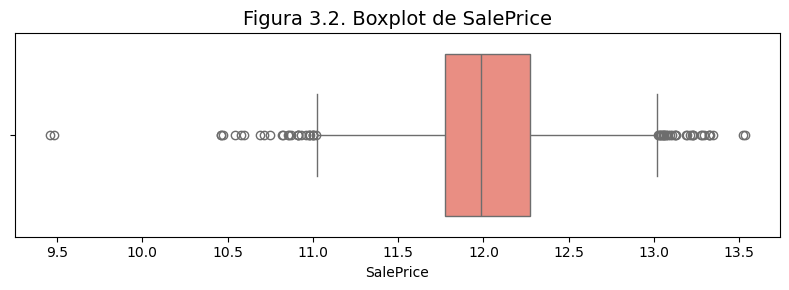

In [5]:
# Boxplot de SalePrice
plt.figure(figsize=(8,3))
sns.boxplot(x=df['SalePrice'], color='salmon')
plt.title("Figura 3.2. Boxplot de SalePrice", fontsize=14)
plt.xlabel("SalePrice")
plt.tight_layout()
plt.show()


## 3.4 GrLivArea vs SalePrice

En el dataset nos encontramos con la variable 'GrLivArea', la cual significa "Ground Living Area" en inglés, que traducido al español significa Area habitable sobre el nivel del suelo. La unidad de esta variable es en pies cuadrados ($ft^2$). La lógica nos indica que en un principio esta variable debería tener una correlación con el precio de venta, a fin de cuenta es lógico pensar que una casa con más area a nivel de suelo cueste más que una más pequeña.

Podemos validar esta asunción de forma gráfica mediante una scatter plot, el cuál nos permitirá ver que tipo de relación esperar entre estas dos variables. Si de verdad hay una correlación positivo, debería haber un incremento en el valor promedio de venta a media que incrementa el área habitable.

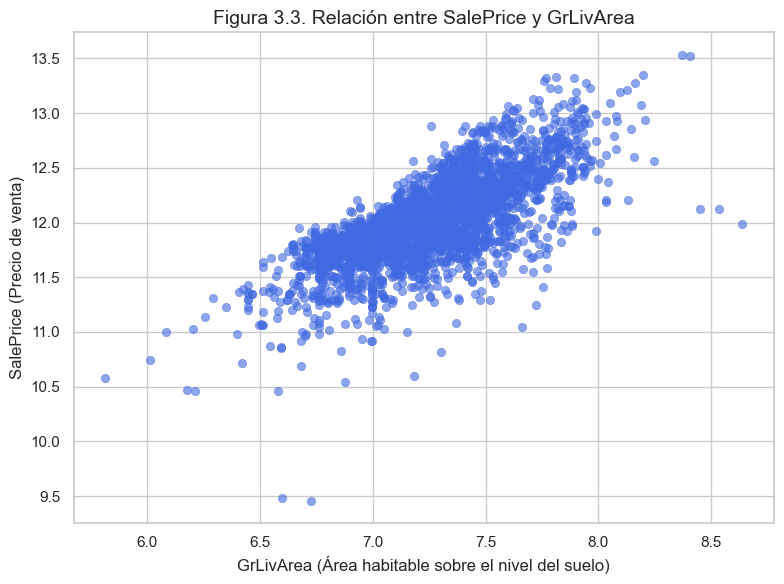

In [6]:
# =============================
# Scatter Plot
# =============================
sns.set(style="whitegrid", palette="deep")

plt.figure(figsize=(8,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, color='royalblue', alpha=0.6, edgecolor=None)

plt.title("Figura 3.3. Relación entre SalePrice y GrLivArea", fontsize=14)
plt.xlabel("GrLivArea (Área habitable sobre el nivel del suelo)")
plt.ylabel("SalePrice (Precio de venta)")
plt.tight_layout()
plt.show()


Tras realizar la gráfica (**Figura 3.3.**), confirmamos que se aprecia una correlación positiva bastante marcada, lo que puede ser un indicio que el área habitable es un gran predictor del precio de venta, a falta de análisis estadísticos más rigurosos.

## 3.5 HeatMap de coeficiente de correlación

Esa correlación observada en el scatter plot se puede calcular matemáticamente mediante el coeficiente de correlación, el cuál es calculado de la siguiente forma:

$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \, \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

Donde:

- $( x_i, y_i )$: valores individuales de cada variable  
- $( \bar{x}, \bar{y} )$: medias de cada variable  
- $( n )$: número de observaciones  



---
De esta manera, podemos hacer una estimación entre la correlación de 2 variables de acuerdo a su coeficiente de correlación:

| Valor de r | Interpretación |
|-------------|----------------|
| **r ≈ 1** | Fuerte correlación positiva |
| **r ≈ -1** | Fuerte correlación negativa |
| **r ≈ 0** | No hay correlación lineal |

Es importante aclarar que correlación no implica causación, y que 2 variables tengan una fuerte correlación no implica que una sea causante de la otra. Sin embargo, para modelos lineales, es una herramienta que nos puede indicar que variables tienen impactos sobre una variable objetivo, siempre que se trate con el cuidado estadístico correspondiente y se establezcan hipótesis que expliquen porque podría haber una relación causal.

---
Continuando con nuestro dataset, calculamos los coeficientes de correlación para todas las variables entre sí, y las graficamos en un heatmap (**Figura 3.4**), donde una casilla más roja indica una correalación más positiva, mientras una casilla más azul indica una correlación más negativa.

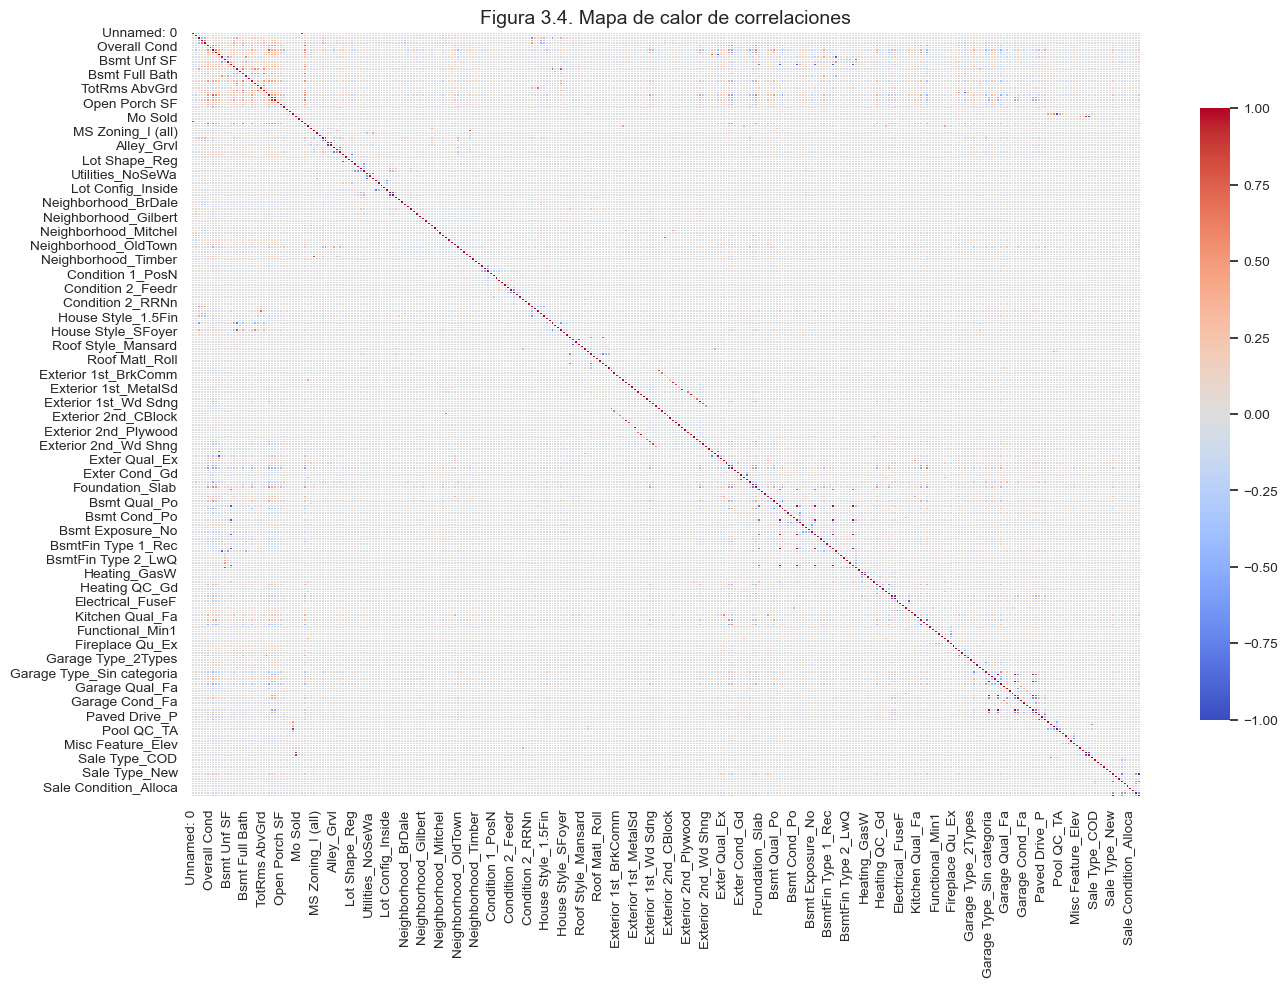

In [7]:
# Heatmap

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,10))
sns.set(style="white", font_scale=0.9)

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,      # Cambia a True si quieres ver los valores numéricos
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Figura 3.4. Mapa de calor de correlaciones", fontsize=14)
plt.tight_layout()
plt.show()

Podemos obtener, entonces, las variables más correlacionadas con SalePrice, tanto positiva como negativamente.

In [8]:
# Mostrar las variables más correlacionadas con SalePrice
target_corr = corr_matrix['SalePrice'].sort_values(ascending=False, key=abs)
print("\nVariables más correlacionadas con SalePrice:")
print(target_corr.head(20))


Variables más correlacionadas con SalePrice:
SalePrice                     1.000000
Overall Qual                  0.825645
Gr Liv Area                   0.723164
Garage Cars                   0.675276
Garage Area                   0.651123
Year Built                    0.615485
1st Flr SF                    0.613423
Exter Qual_TA                -0.586379
Year Remod/Add                0.586153
Full Bath                     0.577335
Foundation_PConc              0.544291
Garage Yr Blt                 0.540362
Kitchen Qual_TA              -0.536078
Fireplace Qu_Sin categoria   -0.509234
Exter Qual_Gd                 0.500054
Bsmt Qual_Ex                  0.492793
TotRms AbvGrd                 0.492580
Fireplaces                    0.488945
Heating QC_Ex                 0.481397
Open Porch SF                 0.462735
Name: SalePrice, dtype: float64


## 3.6 Comparación contra Neighborhood y OverallQual

A diferencia de con la variable 'GrLivingArea', al tratar con variables categóricas no podemos realizar un scatter plot ya que distintas categorías no necesariamente tienen porque poderse ordenar ascendentemente, para así poder definir una correlación positiva o negativa.

En cambio, podemos realizar boxplots para cada categoría y analizar el comportamiento de estadísticos como el promedio a medida que cambiamos de categoría.

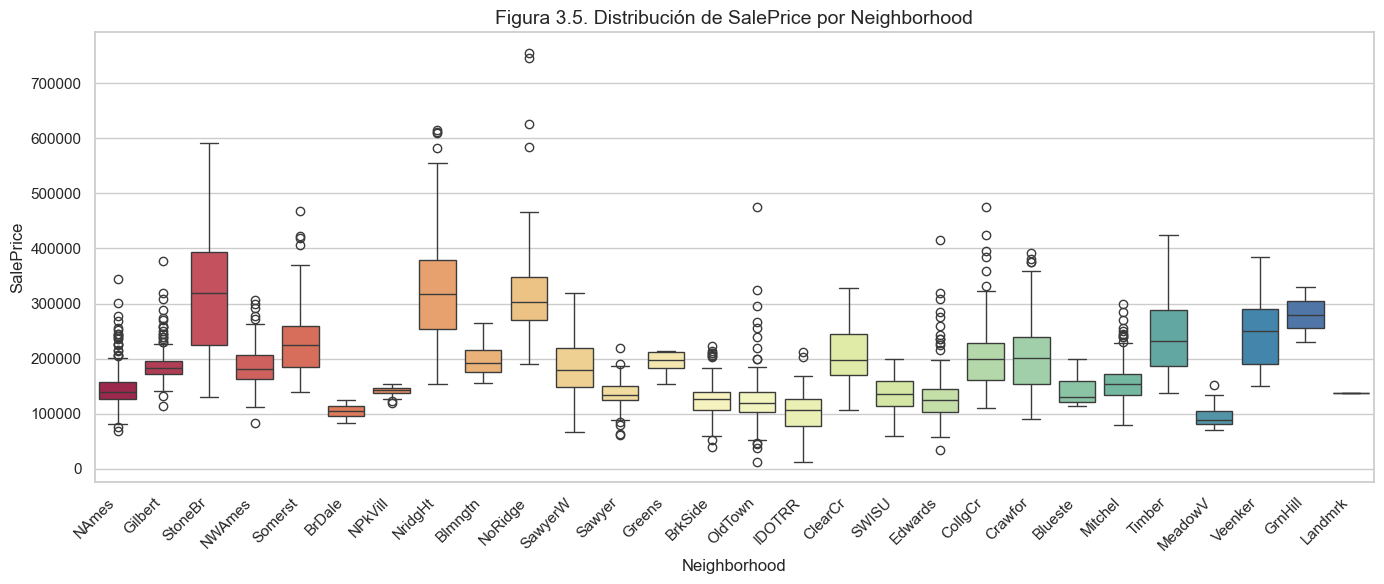

In [9]:
# Boxplot SalePrice vs Neighborhood
sns.set(style="whitegrid", palette="Set2")

df_original = pd.read_csv('../Data/AmesHousing.csv', delimiter=',')


plt.figure(figsize=(14,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_original, palette='Spectral')
plt.title("Figura 3.5. Distribución de SalePrice por Neighborhood", fontsize=14)
plt.xlabel("Neighborhood")
plt.ylabel("SalePrice")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Al analizar de esta manera la categoría Neighborhood, obtenemos la gráfica de la **Figura 3.5**. Aquí observamos que aunque hay categorías que muuestran un incremento en el promedio de venta con respecto a otras, no se evidencia un ordenamiento o patrón cambiando de categoría en categoría, de esta manera la variación observada entre vecindarios puede deberse a factores internos como que en un vecindario puede haber casas más grandes que en otros, que debido al cambio propiamente en sí entre vecindarios.

Esto hace que nuestra decisión de analizar cada categoría de forma independiente a través de un One-Hot-Encoding tenga más lógica.

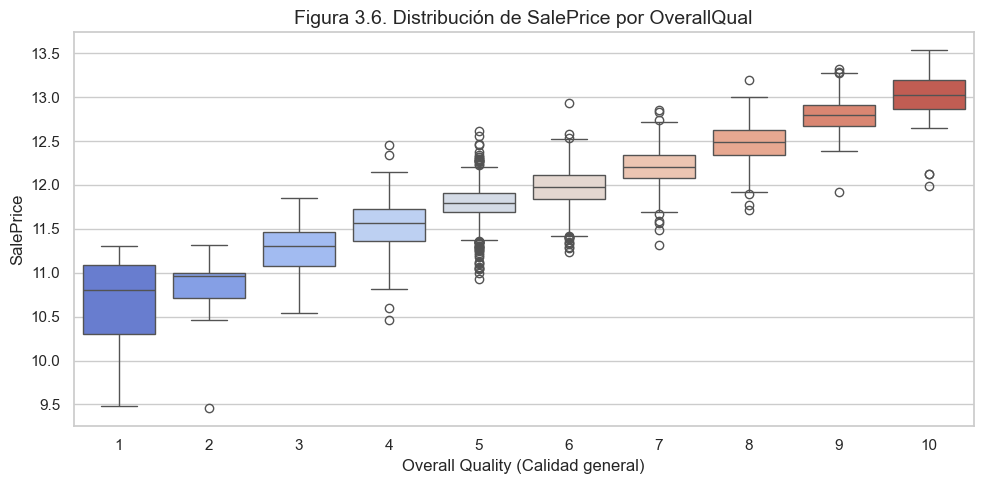

In [10]:
# Boxplot SalePrice vs OverallQual
plt.figure(figsize=(10,5))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df, palette='coolwarm')
plt.title("Figura 3.6. Distribución de SalePrice por OverallQual", fontsize=14)
plt.xlabel("Overall Quality (Calidad general)")
plt.ylabel("SalePrice")
plt.tight_layout()
plt.show()

Caso contrario sucede al analizar la variable Overall Quality (**Figura 3.6**), donde si observamos un marcado incremento al moverse entre categorías, lo que nos permite analizar esta variable como un todo.

## 3.7 Selección de variables

En base al analisis realizado, se decide escoger las siguientes variables:
* Overall Qual
* Gr Liv Area
* Garage Cars
* Garage Area
* Year Built
* 1st Flr SF
* Year Remod/Add
* Full Bath
* Foundation_PConc
* Garage Yr Blt
* Exter Qual_Gd
* Fireplace Qu_Sin categoria
* Kitchen Qual_TA
* Exter Qual_TA

El criterio usado para escoger estas variables es todas las variables cuyo valor absoluto del factor de correlación sea superior a 0.5

In [11]:
pd.Series(target_corr).where(lambda x : np.abs(x)>0.5).dropna()

SalePrice                     1.000000
Overall Qual                  0.825645
Gr Liv Area                   0.723164
Garage Cars                   0.675276
Garage Area                   0.651123
Year Built                    0.615485
1st Flr SF                    0.613423
Exter Qual_TA                -0.586379
Year Remod/Add                0.586153
Full Bath                     0.577335
Foundation_PConc              0.544291
Garage Yr Blt                 0.540362
Kitchen Qual_TA              -0.536078
Fireplace Qu_Sin categoria   -0.509234
Exter Qual_Gd                 0.500054
Name: SalePrice, dtype: float64

Adicionalmente, realizamos limpieza de outliers en las columnas escogidas:

In [12]:
# Limpieza de outliers
before = len(df)
columns = list(pd.Series(target_corr).where(lambda x : x>0.5).dropna().index)

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar filas dentro de los límites
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

after = len(df)    
print(f"{before - after} filas eliminadas ({(before - after)/before:.2%})")

134 filas eliminadas (4.57%)


In [13]:
# Definición de variable regresores.
regressor_columns = list(pd.Series(target_corr).where(lambda x : abs(x)>0.5).dropna().index)

regressor_columns

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Year Built',
 '1st Flr SF',
 'Exter Qual_TA',
 'Year Remod/Add',
 'Full Bath',
 'Foundation_PConc',
 'Garage Yr Blt',
 'Kitchen Qual_TA',
 'Fireplace Qu_Sin categoria',
 'Exter Qual_Gd']

---
Finalmente, exportamos nuestro DataFrame, con únicamente las variables candidatas para su uso futuro.

In [14]:
df_final = df[regressor_columns]
df_final.to_csv('../Data/Ames-Housing-regressor-columns.csv', index=False)